In [1]:
import mailbox, pandas as pd, numpy as np 
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse as parse_datetime
%matplotlib inline


In [2]:

# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', 
                               size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', 
                               size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', 
                               size=12, weight='normal', stretch='normal')

In [3]:
# load the mbox file
path = 'All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(path)
print('There are {:,} messages in the archive.'.format(len(mbox)))


There are 2,460 messages in the archive.


In [16]:
# get a list of the dates/times of all the messages in the mbox
all_dates = []
all_times = []
for message in mbox:
    # it's an email and not a chat if there's no label, 
    #or if there's a label but it's not 'chat'
    if not 'X-Gmail-Labels' in message or ('X-Gmail-Labels' in message 
                                           and not 'Chat' in message['X-Gmail-Labels']):
        if 'Date' in message and message['Date'] is not None:
            try:
                date, time = str(parse_datetime(message['Date'])).split(' ')
                #print(date,time)
            except Exception as e:
                print(e, message['Date'])
            all_dates.append(date)
            all_times.append(time)
        else:
            # hangouts messages have no Date key, so skip them
            pass
print('There are {:,} messages with dates.'.format(len(all_dates)))



There are 1,774 messages with dates.


### Plot the Gmail Traffic by Date

In [18]:
# get the count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(date_counts)))
date_counts

There are 588 dates with messages.


2017-07-26    3
2017-08-03    1
2017-08-05    1
2017-08-11    1
2017-08-12    1
             ..
2020-02-18    9
2020-02-19    1
2020-02-20    8
2020-02-21    5
2020-02-22    2
Length: 588, dtype: int64

In [19]:
time_counts = pd.Series(all_times).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(time_counts)))
time_counts


There are 1,747 dates with messages.


00:02:13+05:30    1
00:04:03+00:00    1
00:06:52-07:00    1
00:10:31-07:00    1
00:10:44-07:00    1
                 ..
23:43:02-07:00    1
23:48:51-07:00    1
23:54:12-07:00    1
23:56:05-07:00    1
23:57:48+00:00    1
Length: 1747, dtype: int64

In [33]:
#not every date necessarily has a message, 
#so fill in missing dates in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
#print(date_range)
index = date_range.map(lambda x: str(x.date()))
#print(index)
date_counts = date_counts.reindex(index, fill_value=0)

print('There are {:,} dates total in the range, with or without messages.'.format(len(date_counts)))
date_counts

There are 942 dates total in the range, with or without messages.


2017-07-26    3
2017-07-27    0
2017-07-28    0
2017-07-29    0
2017-07-30    0
             ..
2020-02-18    9
2020-02-19    1
2020-02-20    8
2020-02-21    5
2020-02-22    2
Length: 942, dtype: int64

In [36]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([label if '01-01' in label 
                     else None for label in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels


159    2018-01-01
524    2019-01-01
889    2020-01-01
dtype: object

findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.


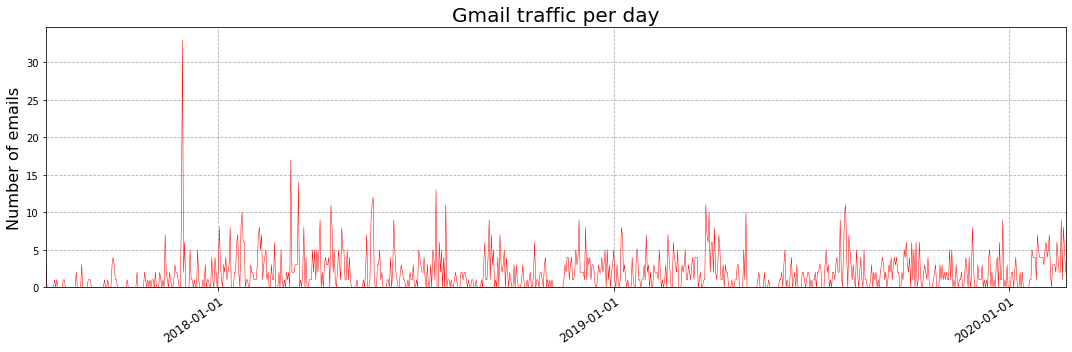

In [9]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=0.5, alpha=1, color='red')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', 
                   ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per day', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-day.png', dpi=96)
plt.show()

In [10]:
# get the count per month
all_months = [x[:-3] for x in all_dates]
month_counts = pd.Series(all_months).value_counts().sort_index()
month_counts

2017-07      3
2017-08      9
2017-09     17
2017-10      8
2017-11     74
2017-12     37
2018-01     91
2018-02     71
2018-03     83
2018-04    104
2018-05     63
2018-06     44
2018-07     79
2018-08     21
2018-09     75
2018-10     38
2018-11     50
2018-12     74
2019-01     63
2019-02     57
2019-03     87
2019-04     61
2019-05     22
2019-06     35
2019-07     56
2019-08     79
2019-09     68
2019-10     57
2019-11     52
2019-12     51
2020-01     59
2020-02     86
dtype: int64

In [11]:
# not every month necessarily has a message, so fill in missing months in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)
month_counts

2017-07      3
2017-08      9
2017-09     17
2017-10      8
2017-11     74
2017-12     37
2018-01     91
2018-02     71
2018-03     83
2018-04    104
2018-05     63
2018-06     44
2018-07     79
2018-08     21
2018-09     75
2018-10     38
2018-11     50
2018-12     74
2019-01     63
2019-02     57
2019-03     87
2019-04     61
2019-05     22
2019-06     35
2019-07     56
2019-08     79
2019-09     68
2019-10     57
2019-11     52
2019-12     51
2020-01     59
2020-02     86
dtype: int64

In [12]:

# create a series of labels for the plot: each month
xlabels = pd.Series([label if '-12' in label else None for label in month_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]
xlabels

5     2017-12
17    2018-12
29    2019-12
dtype: object

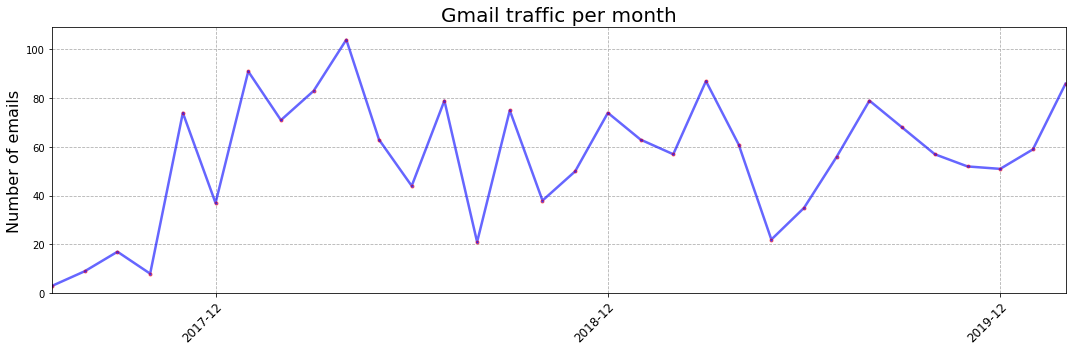

In [13]:
# plot the counts per month
fig = plt.figure(figsize=[15, 5])
ax = month_counts.plot(kind='line', linewidth=2.5, alpha=0.6, color='b', marker='.', 
                       markeredgecolor='r')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per month', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-month.png', dpi=96)
plt.show()

In [14]:
# get the count per day of the week
day_counts = pd.DataFrame()
day_counts['count'] = date_counts
day_counts['day_of_week'] = date_counts.index.map(lambda x: parse_datetime(x).weekday())
mean_day_counts = day_counts.groupby('day_of_week')['count'].mean()
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_day_counts

day_of_week
0    1.985075
1    2.149254
2    2.340741
3    2.162963
4    2.237037
5    1.637037
6    0.664179
Name: count, dtype: float64

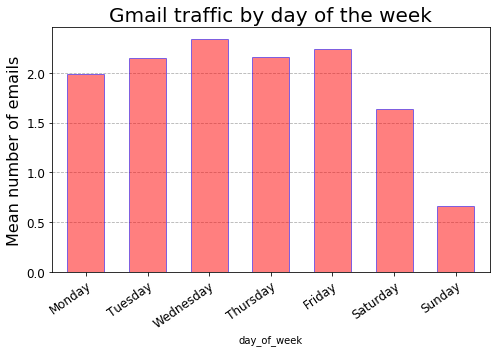

In [15]:
fig = plt.figure(figsize=[7, 5])
ax = mean_day_counts.plot(kind='bar', width=0.6, alpha=0.5, color='r', edgecolor='b',zorder=2)
#The default drawing order for axes is patches, lines, text  
#Patch / PatchCollection 	1
#Line2D / LineCollection 	2
#Text	3
ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Gmail traffic by day of the week', fontproperties=title_font)
ax.set_ylabel('Mean number of emails', fontproperties=label_font)
fig.tight_layout()
fig.savefig('gmail-traffic by day of week.png', dpi=96)
plt.show()

In [16]:
# get the count per hour of the day
times = pd.Series(all_times).map(lambda x: '{:02}:00'.format(parse_datetime(x).hour))
time_counts = times.value_counts().sort_index()
time_counts

00:00     24
01:00     28
02:00     25
03:00     31
04:00     37
05:00     44
06:00     87
07:00     40
08:00     75
09:00    147
10:00    178
11:00    175
12:00    140
13:00     73
14:00    116
15:00    153
16:00    110
17:00     56
18:00     23
19:00     30
20:00     71
21:00     47
22:00     41
23:00     23
dtype: int64

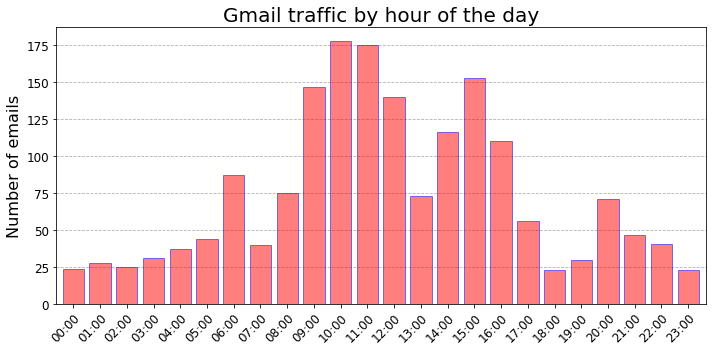

In [17]:
fig = plt.figure(figsize=[10, 5])
ax = time_counts.plot(kind='bar', width=0.8, alpha=0.5, color='r', edgecolor='b', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(time_counts.index, rotation=45, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Gmail traffic by hour of the day', fontproperties=title_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
fig.tight_layout()
fig.savefig('gmail traffic by hour of the day.png', dpi=96)
plt.show()

In [18]:
# get the count per minute of the day, as hh:mm
minutes = pd.Series(all_times).map(lambda x: '{:02}:{:02}'.format(parse_datetime(x).hour, 
                                                                  parse_datetime(x).minute))
minute_counts = minutes.value_counts().sort_index()
minute_counts

00:02    1
00:04    1
00:06    1
00:10    2
00:16    1
        ..
23:43    1
23:48    1
23:54    1
23:56    1
23:57    1
Length: 875, dtype: int64

In [19]:
# not every minute necessarily has a message, so fill in missing times with zeros
time_range = pd.date_range(start='0:00', end='23:59', freq='1min')
index = time_range.map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minute_counts.reindex(index, fill_value=0)
minute_counts

00:00    0
00:01    0
00:02    1
00:03    0
00:04    1
        ..
23:55    0
23:56    1
23:57    1
23:58    0
23:59    0
Length: 1440, dtype: int64

In [20]:
# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in minute_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

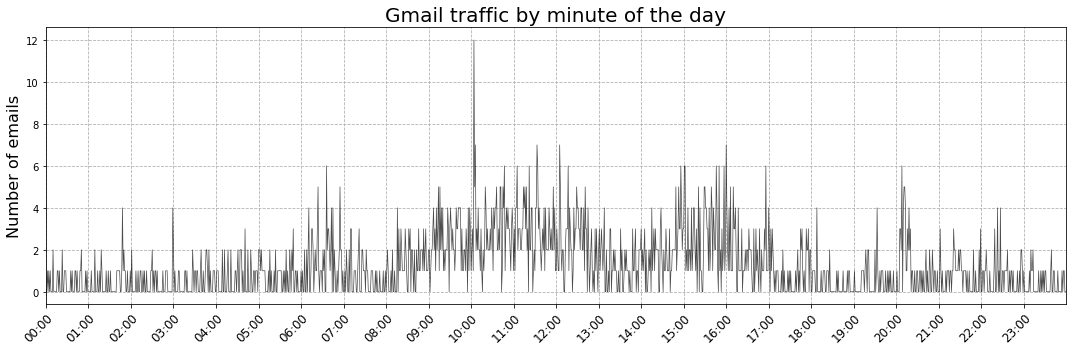

In [21]:
# plot the counts per minute
fig = plt.figure(figsize=[15, 5])
ax = minute_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='k')
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', 
                   fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic by minute of the day', fontproperties=title_font)
fig.tight_layout()
fig.savefig('gmail-traffic-minute.png', dpi=96)
plt.show()